In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors,metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import joblib

In [2]:
data=pd.read_csv("microplastic.csv")
data.head(5)



,OBJECTID,Latitude (degree),Longitude(degree),Ocean,Region,Subregion,Country,State,Beach Location,Marine Setting,...,DOI,ORGANIZATION,KEYWORDS,NCEI Accession No,NCEI Accession No. Link,Symbology,GlobalID,Date (MM-DD-YYYY),x,y
0,1,45.28,-60.29,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",2ce1d1d4-4231-4ab8-af74-0b7fbb1e028b,7/13/1989 12:00:00 AM,-60.29,45.28
1,2,40.93,-70.65,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",8e3c8426-5ab0-421e-abb2-6b90197ada7a,10/12/1989 12:00:00 AM,-70.65,40.93
2,3,40.93,-70.65,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",99bda337-9f0c-4f58-9960-8b00c1110a7c,10/12/1989 12:00:00 AM,-70.65,40.93
3,4,40.30,-69.77,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",1f20e926-2a84-4e42-8478-8a5af5aecacc,10/12/1989 12:00:00 AM,-69.77,40.30
4,5,39.88,-67.15,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",a0df6bee-9c60-4621-a0bc-3329e3f11720,10/15/1989 12:00:00 AM,-67.15,39.88


In [3]:
data.columns

Index(['OBJECTID', 'Latitude (degree)', 'Longitude(degree)', 'Ocean', 'Region',
       'Subregion', 'Country', 'State', 'Beach Location', 'Marine Setting',
       'Ocean Bottom Depth (m)', 'Water Sample Depth (m)',
       'Sediment Sample Depth (m)', 'Sampling Method', 'Mesh size (mm)',
       'Transect No', 'Sampling point on beach', 'Volunteers Number',
       'Collecting Time (min)', 'Standardized Nurdle  Amount',
       'Microplastics measurement', 'Unit', 'Concentration class range',
       'Concentration class text', 'Short Reference', 'Long Reference', 'DOI',
       'ORGANIZATION', 'KEYWORDS', 'NCEI Accession No',
       'NCEI Accession No. Link', 'Symbology', 'GlobalID', 'Date (MM-DD-YYYY)',
       'x', 'y'],
      dtype='object')

In [4]:
cols_to_drop = [
    "OBJECTID",
    "Subregion",
    "Ocean Bottom Depth (m)",
    "Sediment Sample Depth (m)",
    "Transect No",
    "Sampling point on beach",
    "Short Reference",
    "Long Reference",
    "DOI",
    "ORGANIZATION",
    "KEYWORDS",
    "NCEI Accession No",
    "NCEI Accession No. Link",
    "Symbology",
    "GlobalID",
    "x", 
    "y"   
]
data = data.drop(columns=cols_to_drop, errors="ignore")
data

,Latitude (degree),Longitude(degree),Ocean,Region,Country,State,Beach Location,Marine Setting,Water Sample Depth (m),Sampling Method,Mesh size (mm),Volunteers Number,Collecting Time (min),Standardized Nurdle Amount,Microplastics measurement,Unit,Concentration class range,Concentration class text,Date (MM-DD-YYYY)
0,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,0.3350,NaN,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,7/13/1989 12:00:00 AM
1,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,0.3350,NaN,NaN,NaN,0.002276,pieces/m3,0.0005-0.005,Low,10/12/1989 12:00:00 AM
2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,0.3350,NaN,NaN,NaN,0.004320,pieces/m3,0.0005-0.005,Low,10/12/1989 12:00:00 AM
3,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,0.3350,NaN,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,10/12/1989 12:00:00 AM
4,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,0.3350,NaN,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,10/15/1989 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,-5.933333,39.360000,Indian Ocean,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,NaN,Ekman grab,0.0007,NaN,NaN,NaN,188.300000,pieces kg-1 d.w.,150-200,High,12/23/2019 12:00:00 AM
22526,-5.500000,39.120000,Indian Ocean,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,NaN,Ekman grab,0.0007,NaN,NaN,NaN,155.270000,pieces kg-1 d.w.,150-200,High,12/22/2019 12:00:00 AM
22527,-6.450000,39.466667,Indian Ocean,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,NaN,Ekman grab,0.0007,NaN,NaN,NaN,58.070000,pieces kg-1 d.w.,20-150,Medium,12/25/2019 12:00:00 AM
22528,-6.320000,39.210000,Indian Ocean,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,NaN,Ekman grab,0.0007,NaN,NaN,NaN,210.000000,pieces kg-1 d.w.,>200,Very High,12/28/2019 12:00:00 AM


In [5]:
data.columns


Index(['Latitude (degree)', 'Longitude(degree)', 'Ocean', 'Region', 'Country',
       'State', 'Beach Location', 'Marine Setting', 'Water Sample Depth (m)',
       'Sampling Method', 'Mesh size (mm)', 'Volunteers Number',
       'Collecting Time (min)', 'Standardized Nurdle  Amount',
       'Microplastics measurement', 'Unit', 'Concentration class range',
       'Concentration class text', 'Date (MM-DD-YYYY)'],
      dtype='object')

In [6]:


numeric_cols = data.select_dtypes(include=["number"]).columns
print(numeric_cols)

Index(['Latitude (degree)', 'Longitude(degree)', 'Water Sample Depth (m)',
       'Mesh size (mm)', 'Volunteers Number', 'Collecting Time (min)',
       'Standardized Nurdle  Amount', 'Microplastics measurement'],
      dtype='object')


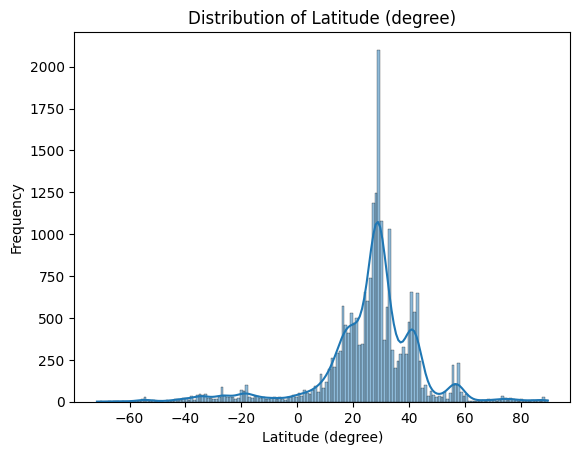

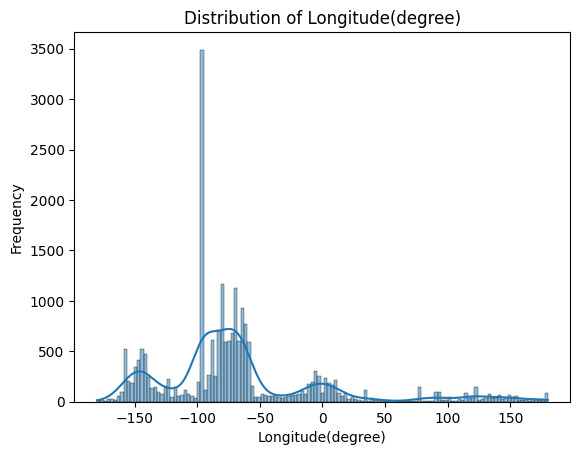

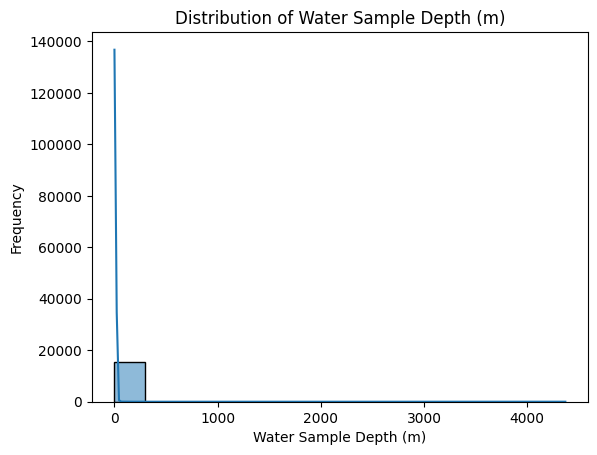

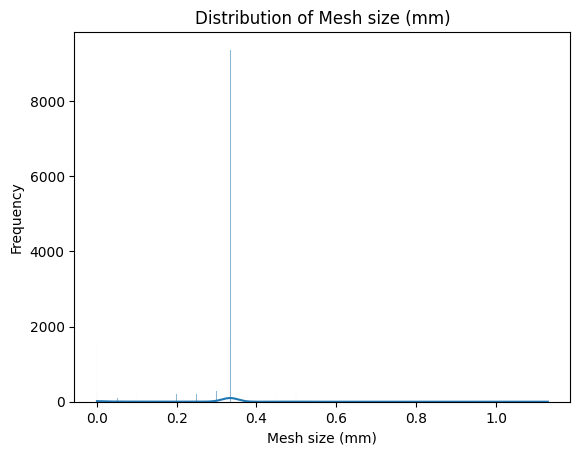

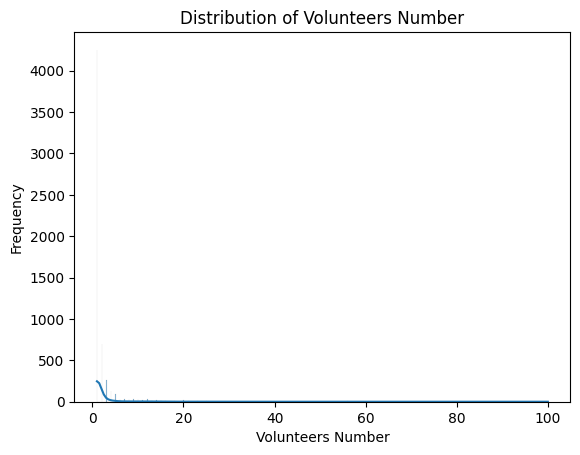

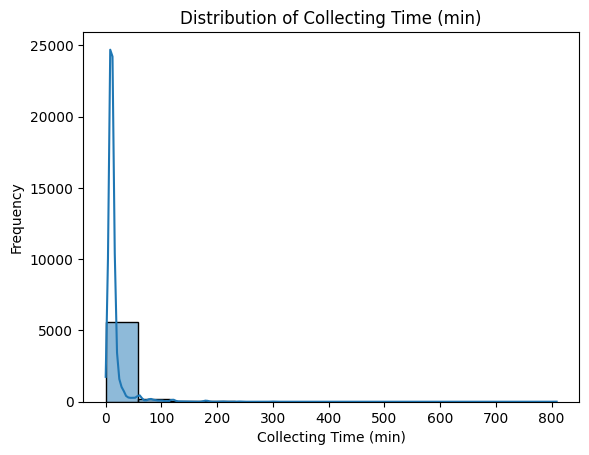

In [ ]:
for col in numeric_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [55]:
data["date"]=pd.to_datetime(data['Date (MM-DD-YYYY)'],format="%m/%d/%Y %I:%M:%S %p")

data["year"]=data["date"].dt.year
data["month"]=data["date"].dt.month
data["day"]=data["date"].dt.day
data["weekday"]=data["date"].dt.weekday
data=data.drop(columns='Date (MM-DD-YYYY)')
data

,OBJECTID,Latitude (degree),Longitude(degree),Ocean,Region,Subregion,Country,State,Beach Location,Marine Setting,...,NCEI Accession No. Link,Symbology,GlobalID,x,y,date,year,month,day,weekday
0,1,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",2ce1d1d4-4231-4ab8-af74-0b7fbb1e028b,-60.290000,45.280000,1989-07-13,1989,7,13,3
1,2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",8e3c8426-5ab0-421e-abb2-6b90197ada7a,-70.650000,40.930000,1989-10-12,1989,10,12,3
2,3,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",99bda337-9f0c-4f58-9960-8b00c1110a7c,-70.650000,40.930000,1989-10-12,1989,10,12,3
3,4,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",1f20e926-2a84-4e42-8478-8a5af5aecacc,-69.770000,40.300000,1989-10-12,1989,10,12,3
4,5,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",a0df6bee-9c60-4621-a0bc-3329e3f11720,-67.150000,39.880000,1989-10-15,1989,10,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,22941,-5.933333,39.360000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, High, 150-200 pieces kg-1 d.w.",47556e88-2992-48a6-a94d-97dee9ec0f4a,39.360000,-5.933333,2019-12-23,2019,12,23,0
22526,22942,-5.500000,39.120000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, High, 150-200 pieces kg-1 d.w.",55430f26-f5df-44d6-86bb-a532cca54bbc,39.120000,-5.500000,2019-12-22,2019,12,22,6
22527,22943,-6.450000,39.466667,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Medium, 20-150 pieces kg-1 d.w.",c39e2f1f-1d4b-4f2f-830d-60abe0b88671,39.466667,-6.450000,2019-12-25,2019,12,25,2
22528,22944,-6.320000,39.210000,Indian Ocean,NaN,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,...,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Very High, >200 pieces kg-1 d.w.",c46c197f-38df-4f28-9118-b20252f3d123,39.210000,-6.320000,2019-12-28,2019,12,28,5


In [8]:
data.to_csv("Microplastic_data1.csv")
data

,Latitude (degree),Longitude(degree),Ocean,Region,Country,State,Beach Location,Marine Setting,Water Sample Depth (m),Sampling Method,...,Standardized Nurdle Amount,Microplastics measurement,Unit,Concentration class range,Concentration class text,date,year,month,day,weekday
0,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-07-13,1989,7,13,3
1,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.002276,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.004320,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
3,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-12,1989,10,12,3
4,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-15,1989,10,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,-5.933333,39.360000,Indian Ocean,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,NaN,Ekman grab,...,NaN,188.300000,pieces kg-1 d.w.,150-200,High,2019-12-23,2019,12,23,0
22526,-5.500000,39.120000,Indian Ocean,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,NaN,Ekman grab,...,NaN,155.270000,pieces kg-1 d.w.,150-200,High,2019-12-22,2019,12,22,6
22527,-6.450000,39.466667,Indian Ocean,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,NaN,Ekman grab,...,NaN,58.070000,pieces kg-1 d.w.,20-150,Medium,2019-12-25,2019,12,25,2
22528,-6.320000,39.210000,Indian Ocean,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,NaN,Ekman grab,...,NaN,210.000000,pieces kg-1 d.w.,>200,Very High,2019-12-28,2019,12,28,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Latitude (degree)            22530 non-null  float64       
 1   Longitude(degree)            22530 non-null  float64       
 2   Ocean                        22252 non-null  object        
 3   Region                       10262 non-null  object        
 4   Country                      6606 non-null   object        
 5   State                        6186 non-null   object        
 6   Beach Location               6245 non-null   object        
 7   Marine Setting               22530 non-null  object        
 8   Water Sample Depth (m)       15521 non-null  float64       
 9   Sampling Method              22530 non-null  object        
 10  Mesh size (mm)               16666 non-null  float64       
 11  Volunteers Number            5817 non-nul

In [10]:
data.describe

<bound method NDFrame.describe of        Latitude (degree)  Longitude(degree)           Ocean Region   Country  \
0              45.280000         -60.290000  Atlantic Ocean    NaN       NaN   
1              40.930000         -70.650000  Atlantic Ocean    NaN       NaN   
2              40.930000         -70.650000  Atlantic Ocean    NaN       NaN   
3              40.300000         -69.770000  Atlantic Ocean    NaN       NaN   
4              39.880000         -67.150000  Atlantic Ocean    NaN       NaN   
...                  ...                ...             ...    ...       ...   
22525          -5.933333          39.360000    Indian Ocean    NaN  Tanzania   
22526          -5.500000          39.120000    Indian Ocean    NaN  Tanzania   
22527          -6.450000          39.466667    Indian Ocean    NaN  Tanzania   
22528          -6.320000          39.210000    Indian Ocean    NaN  Tanzania   
22529          -6.110000          39.150000    Indian Ocean    NaN  Tanzania   

     

In [11]:
data['Microplastics measurement'].unique()

array([0.0000e+00, 2.2760e-03, 4.3200e-03, ..., 5.8070e+01, 2.1000e+02,
       2.0833e+02], shape=(5877,))

In [53]:
print(data.columns)
data.rename(columns={'Concentration class text':'Concentration_class'},inplace=True)

Index(['OBJECTID', 'Latitude (degree)', 'Longitude(degree)', 'Ocean', 'Region',
       'Subregion', 'Country', 'State', 'Beach Location', 'Marine Setting',
       'Ocean Bottom Depth (m)', 'Water Sample Depth (m)',
       'Sediment Sample Depth (m)', 'Sampling Method', 'Mesh size (mm)',
       'Transect No', 'Sampling point on beach', 'Volunteers Number',
       'Collecting Time (min)', 'Standardized Nurdle  Amount',
       'Microplastics measurement', 'Unit', 'Concentration class range',
       'Concentration class text', 'Short Reference', 'Long Reference', 'DOI',
       'ORGANIZATION', 'KEYWORDS', 'NCEI Accession No',
       'NCEI Accession No. Link', 'Symbology', 'GlobalID', 'Date (MM-DD-YYYY)',
       'x', 'y'],
      dtype='object')


In [13]:
data.to_csv("microplastic_det.csv")
data

,Latitude (degree),Longitude(degree),Ocean,Region,Country,State,Beach Location,Marine Setting,Water Sample Depth (m),Sampling Method,...,Standardized Nurdle Amount,Microplastics measurement,Unit,Concentration class range,Concentration_class,date,year,month,day,weekday
0,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-07-13,1989,7,13,3
1,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.002276,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.004320,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
3,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-12,1989,10,12,3
4,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-15,1989,10,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,-5.933333,39.360000,Indian Ocean,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,NaN,Ekman grab,...,NaN,188.300000,pieces kg-1 d.w.,150-200,High,2019-12-23,2019,12,23,0
22526,-5.500000,39.120000,Indian Ocean,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,NaN,Ekman grab,...,NaN,155.270000,pieces kg-1 d.w.,150-200,High,2019-12-22,2019,12,22,6
22527,-6.450000,39.466667,Indian Ocean,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,NaN,Ekman grab,...,NaN,58.070000,pieces kg-1 d.w.,20-150,Medium,2019-12-25,2019,12,25,2
22528,-6.320000,39.210000,Indian Ocean,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,NaN,Ekman grab,...,NaN,210.000000,pieces kg-1 d.w.,>200,Very High,2019-12-28,2019,12,28,5


In [14]:
data.to_csv("Microplastic1.csv")
data

,Latitude (degree),Longitude(degree),Ocean,Region,Country,State,Beach Location,Marine Setting,Water Sample Depth (m),Sampling Method,...,Standardized Nurdle Amount,Microplastics measurement,Unit,Concentration class range,Concentration_class,date,year,month,day,weekday
0,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-07-13,1989,7,13,3
1,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.002276,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.004320,pieces/m3,0.0005-0.005,Low,1989-10-12,1989,10,12,3
3,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-12,1989,10,12,3
4,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,Ocean water,0.0,Neuston net,...,NaN,0.000000,pieces/m3,0-0.0005,Very Low,1989-10-15,1989,10,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,-5.933333,39.360000,Indian Ocean,NaN,Tanzania,Zanzibar,Pwani-Mchangani,Ocean sediment,NaN,Ekman grab,...,NaN,188.300000,pieces kg-1 d.w.,150-200,High,2019-12-23,2019,12,23,0
22526,-5.500000,39.120000,Indian Ocean,NaN,Tanzania,Zanzibar,Nungwi,Ocean sediment,NaN,Ekman grab,...,NaN,155.270000,pieces kg-1 d.w.,150-200,High,2019-12-22,2019,12,22,6
22527,-6.450000,39.466667,Indian Ocean,NaN,Tanzania,Zanzibar,Kizimkazi,Ocean sediment,NaN,Ekman grab,...,NaN,58.070000,pieces kg-1 d.w.,20-150,Medium,2019-12-25,2019,12,25,2
22528,-6.320000,39.210000,Indian Ocean,NaN,Tanzania,Zanzibar,Bububu,Ocean sediment,NaN,Ekman grab,...,NaN,210.000000,pieces kg-1 d.w.,>200,Very High,2019-12-28,2019,12,28,5


In [15]:
print(data["Concentration_class"].unique())

['Very Low' 'Low' 'Medium' 'High' 'Very High']


In [56]:
y=data[[ 'Concentration_class']].values
x=data[['Ocean', 'Region', 'Country','Marine Setting',
       'Sampling Method', 'Mesh size (mm)', 'Volunteers Number',
       'Collecting Time (min)',  'year',	'month',	'day']]
print(x,y)

                Ocean Region   Country  Marine Setting Sampling Method  \
0      Atlantic Ocean    NaN       NaN     Ocean water     Neuston net   
1      Atlantic Ocean    NaN       NaN     Ocean water     Neuston net   
2      Atlantic Ocean    NaN       NaN     Ocean water     Neuston net   
3      Atlantic Ocean    NaN       NaN     Ocean water     Neuston net   
4      Atlantic Ocean    NaN       NaN     Ocean water     Neuston net   
...               ...    ...       ...             ...             ...   
22525    Indian Ocean    NaN  Tanzania  Ocean sediment      Ekman grab   
22526    Indian Ocean    NaN  Tanzania  Ocean sediment      Ekman grab   
22527    Indian Ocean    NaN  Tanzania  Ocean sediment      Ekman grab   
22528    Indian Ocean    NaN  Tanzania  Ocean sediment      Ekman grab   
22529    Indian Ocean    NaN  Tanzania  Ocean sediment      Ekman grab   

       Mesh size (mm)  Volunteers Number  Collecting Time (min)  year  month  \
0              0.3350          

In [57]:
print(data["Concentration_class"].unique())

['Very Low' 'Low' 'Medium' 'High' 'Very High']


In [58]:

y = data['Concentration_class'].astype(str)
y=y.str.strip()
y=y.str.title()

label_mapping = {
    "Very Low": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very High": 4
}

y = y.map(label_mapping)
y



0        0
1        1
2        1
3        0
4        0
        ..
22525    3
22526    3
22527    2
22528    4
22529    4
Name: Concentration_class, Length: 22530, dtype: int64

In [64]:
numeric_feat = [
    'Mesh size (mm)', 
    'Volunteers Number', 
    'Collecting Time (min)', 
    'year', 'month', 'day',
    'Water Sample Depth (m)',
    'Standardized Nurdle  Amount',
    'Microplastics measurement'
]

categorical_feat = [
    'Ocean', 
    'Region', 
    'Country', 
    'Marine Setting', 
    'Sampling Method']
x_train, x_test, y_train, y_test = train_test_split(data[numeric_feat + categorical_feat], y, test_size=0.2, random_state=42)
x=data[numeric_feat+categorical_feat]
y=data["Concentration_class"].astype(str)
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("impute", num_imputer),
        ("scale", StandardScaler())
    ]), numeric_feat),
    
    ("cat", Pipeline([
        ("impute", cat_imputer),
        ("encode", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_feat) 
])

lr_pipe=Pipeline([("prep",preprocessor),("model",LogisticRegression())])
lr_pipe.fit(x,y)

C:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:


print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

pred=lr_pipe.predict(x_test)
print("predictions:",pred)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy: 0.5810031069684864
Confusion Matrix:
 [[ 127    0  405    5   30]
 [   0   48  279    0  151]
 [  42   36 1753    0  282]
 [  30    1   27  112    1]
 [   5   18  572    4  578]]
Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.22      0.33       567
         Low       0.47      0.10      0.17       478
      Medium       0.58      0.83      0.68      2113
   Very High       0.93      0.65      0.77       171
    Very Low       0.55      0.49      0.52      1177

    accuracy                           0.58      4506
   macro avg       0.63      0.46      0.49      4506
weighted avg       0.58      0.58      0.54      4506

predictions: ['Medium' 'Medium' 'Very Low' ... 'Medium' 'Medium' 'Very Low']
Accuracy: 0.5810031069684864
Confusion Matrix:
 [[ 127    0  405    5   30]
 [   0   48  279    0  151]
 [  42   36 1753    0  282]
 [  30    1   27  112    1]
 [   5   18  572    4  578]]
Classification Report:
         

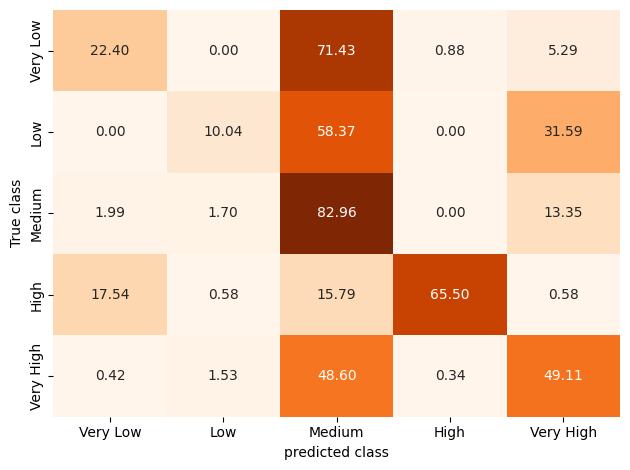

In [70]:
import numpy as np
cm1=confusion_matrix(y_test,pred)
cm_percent = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent,annot=True,fmt=".2f",cbar=False,cmap="Oranges",xticklabels=[ "Very Low","Low","Medium","High","Very High"],yticklabels=[ "Very Low","Low","Medium","High","Very High"]
                                                                        )
plt.xlabel("predicted class")
plt.ylabel("True class")
plt.savefig("confusion_matrix_logisticregression.jpg", format='jpg', dpi=600)
plt.tight_layout()
plt.show()

In [71]:
report=classification_report(y_test,pred,output_dict=True,target_names=[ "Very Low","Low","Medium","High","Very High"])
df=pd.DataFrame(report)
df

,Very Low,Low,Medium,High,Very High,accuracy,macro avg,weighted avg
precision,0.622549,0.466019,0.577404,0.925620,0.554702,0.581003,0.629259,0.578554
recall,0.223986,0.100418,0.829626,0.654971,0.491079,0.581003,0.460016,0.581003
f1-score,0.329442,0.165232,0.680909,0.767123,0.520955,0.581003,0.492732,0.543470
support,567.000000,478.000000,2113.000000,171.000000,1177.000000,0.581003,4506.000000,4506.000000


In [77]:

numeric_feat = [
    'Mesh size (mm)', 
    'Volunteers Number', 
    'Collecting Time (min)', 
    'year', 'month', 'day',
    'Water Sample Depth (m)',
    'Standardized Nurdle  Amount',
    'Microplastics measurement'
]

categorical_feat = [
    'Ocean', 
    'Region', 
    'Country', 
    'Marine Setting', 
    'Sampling Method']

feature_cols = numeric_feat + categorical_feat
x = data[feature_cols]
y = data['Concentration_class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("impute", num_imputer),
        ("scale", StandardScaler())
    ]), numeric_feat),

    ("cat", Pipeline([
        ("impute", cat_imputer),
        ("encode", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_feat)
])

knn_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn_pipe.fit(x_train, y_train)
joblib.dump(knn_pipe, "models/knn_pipeline.joblib")

['models/knn_pipeline.joblib']

In [67]:
pred1=knn_pipe.predict(x_test)
acc=accuracy_score(y_test,pred1)
print("predictions:",pred1)
print("accuracy:",acc)

predictions: ['Medium' 'Low' 'Medium' ... 'Low' 'Medium' 'Very Low']
accuracy: 0.6597869507323568


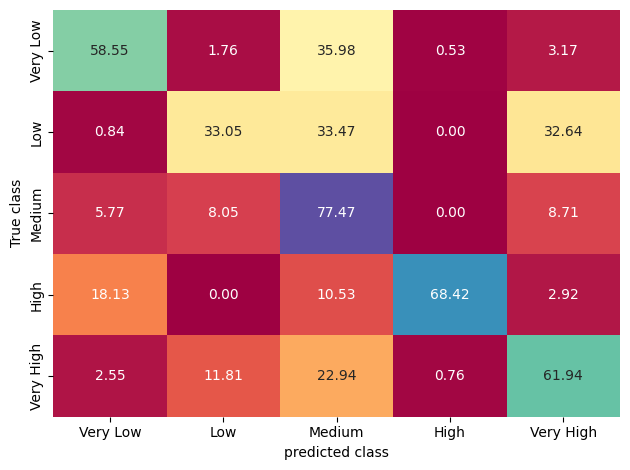

In [69]:

cm=confusion_matrix(y_test,pred1)
m_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(m_percent,annot=True,fmt=".2f",cbar=False,cmap="Spectral",xticklabels=[ "Very Low","Low","Medium","High","Very High"],yticklabels=[ "Very Low","Low","Medium","High","Very High"]
                                                                        )
plt.xlabel("predicted class")
plt.ylabel("True class")
plt.savefig("confusion_matrix_Knn.jpg", format='jpg', dpi=600)
plt.tight_layout()
plt.show()

In [72]:
report=classification_report(y_test,pred1,output_dict=True,target_names=[ "Very Low","Low","Medium","High","Very High"])
df=pd.DataFrame(report)
df

,Very Low,Low,Medium,High,Very High,accuracy,macro avg,weighted avg
precision,0.639692,0.331237,0.715159,0.906977,0.667582,0.659787,0.652129,0.659788
recall,0.585538,0.330544,0.774728,0.684211,0.619371,0.659787,0.598878,0.659787
f1-score,0.611418,0.330890,0.743753,0.780000,0.642574,0.659787,0.621727,0.658251
support,567.000000,478.000000,2113.000000,171.000000,1177.000000,0.659787,4506.000000,4506.000000


In [73]:
print("y_test dtype:", y_test.dtype)
print("y_test shape:", y_test.shape)
print("pred1 shape:", pred1.shape)
print("y_test sample:", y_test[:5])
print("pred1 sample:", pred1[:5])

y_test dtype: object
y_test shape: (4506,)
pred1 shape: (4506,)
y_test sample: 21945      Medium
4049       Medium
8227     Very Low
6959     Very Low
16666      Medium
Name: Concentration_class, dtype: object
pred1 sample: ['Medium' 'Low' 'Medium' 'Very Low' 'Low']


In [74]:
from sklearn import svm
numeric_feat = [
    'Mesh size (mm)', 
    'Volunteers Number', 
    'Collecting Time (min)', 
    'year', 'month', 'day',
    'Water Sample Depth (m)',
    'Standardized Nurdle  Amount',
    'Microplastics measurement'
]

categorical_feat = [
    'Ocean', 
    'Region', 
    'Country', 
    'Marine Setting', 
    'Sampling Method']
x_train, x_test, y_train, y_test = train_test_split(
    data[numeric_feat + categorical_feat], y, test_size=0.2, random_state=42)

x=data[numeric_feat+categorical_feat]
y=data['Concentration_class']
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("impute", num_imputer),
        ("scale", StandardScaler())
    ]), numeric_feat),
    
    ("cat", Pipeline([
        ("impute", cat_imputer),
        ("encode", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_feat)
])

svm_pipe=Pipeline([("prep",preprocessor),("svm",svm.SVC())])
svm_pipe.fit(x,y)

,steps,"[('prep', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:

pred3=svm_pipe.predict(x_test)
acc=accuracy_score(y_test,pred3)
print("predictions:",pred3)
print("accuracy:",acc)



predictions: ['Medium' 'Medium' 'Very Low' ... 'Medium' 'Medium' 'Very Low']
accuracy: 0.5761207279183311


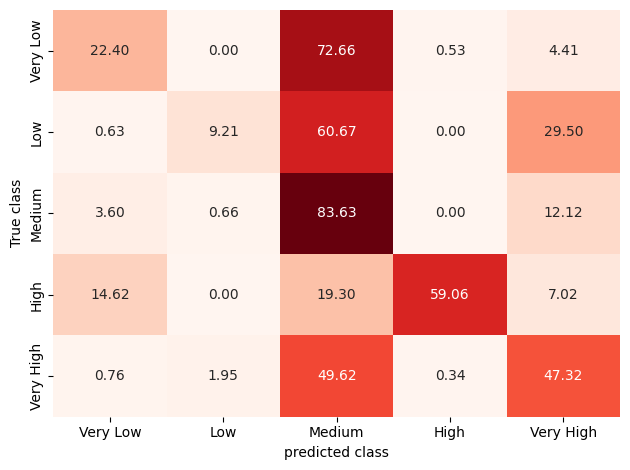

In [76]:
import numpy as np
cm2=confusion_matrix(y_test,pred3)
cm2_percent = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm2_percent,annot=True,fmt=".2f",cbar=False,cmap="Reds",xticklabels=[ "Very Low","Low","Medium","High","Very High"],yticklabels=[ "Very Low","Low","Medium","High","Very High"]
                                                                        )
plt.xlabel("predicted class")
plt.ylabel("True class")
plt.savefig("confusion_matrix_svm.jpg", format='jpg', dpi=600)
plt.tight_layout()
plt.show()

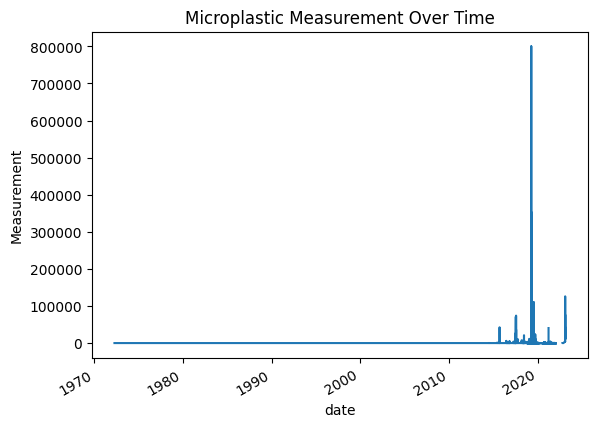

In [46]:
data["date"] = pd.to_datetime(data[["year", "month", "day"]])
data.sort_values("date", inplace=True)
data.set_index("date")["Microplastics measurement"].plot()
plt.title("Microplastic Measurement Over Time")
plt.ylabel("Measurement")
plt.show()